## 模拟梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1., 6., 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
# 2.5就是plot_x数组的平均值
plot_y = (plot_x-2.5)**2 - 1.

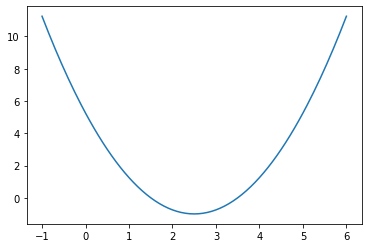

In [4]:
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
# 浮点数存在误差，所以精度不能设置为0
epsilon = 1e-8
# 学习率
eta = 0.1

In [6]:
# 损失函数
def J(theta):
    return (theta-2.5)**2 - 1.

# 导数函数
def dJ(theta):
    return 2*(theta-2.5)

# 初始点
theta = 0.0

# 梯度下降的循环
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
    
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


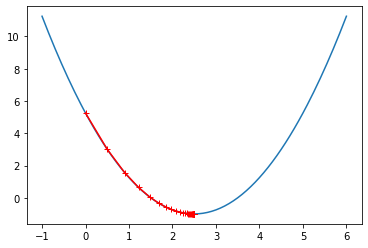

In [7]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
plt.show()

In [8]:
# 45次查找和一次初始值
len(theta_history)

46

In [9]:
theta_history = []

def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)

    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
    plt.show()

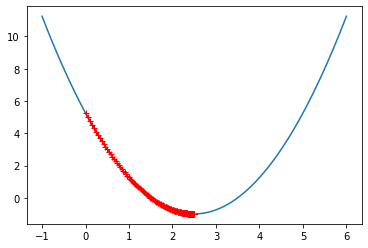

In [10]:
eta = 0.01
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [11]:
len(theta_history)

424

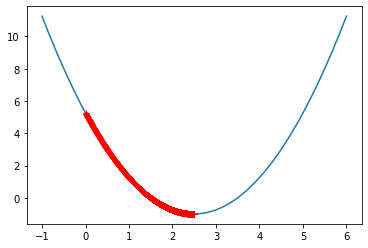

In [12]:
eta = 0.001
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [13]:
len(theta_history)

3682

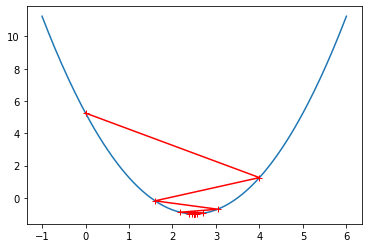

In [14]:
eta = 0.8
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [15]:
# eta太大导致损失函数的值越来越大
eta = 1.1
theta_history = []
gradient_descent(0, eta)

OverflowError: (34, 'Result too large')

In [16]:
# 程序运行时像上面抛出异常不好。进行异常处理
def J(theta):
    try:
        return (theta-2.5)**2 - 1.
    except:
        return float('inf')

In [17]:
# 进行异常处理之后可能会陷入死循环，所以加入重复次数最大值，以防止重复次数过大
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    i_iter = 0
    theta_history.append(initial_theta)

    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
        i_iter += 1
        
    return

In [18]:
eta = 1.1
theta_history = []
gradient_descent(0, eta)

In [19]:
len(theta_history)

10001

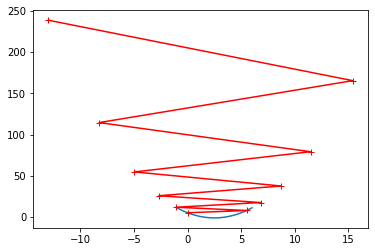

In [20]:
eta = 1.1
theta_history = []
gradient_descent(0, eta, n_iters=10)
plot_theta_history()